In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from scipy import stats
from scipy.stats import linregress

# Set global float formatting
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
# Load the source data file and read and display it with Pandas

movie_data = Path("English_Movies_Data.csv")
movie_data_df = pd.read_csv(movie_data)
movie_data_df

,Name,Date,Score,Genre,Language,Budget,Revenue,Profit,History,Animation,...,Music,Romance,Fantasy,Thriller,Action,War,Mystery,Western,Drama,TV Movie
0,The Passion of the Christ,2004-02-25,74.00,Drama,English,"25,000,000.00","622,313,635.00","597,313,635.00",0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
1,John Wick: Chapter 2,2017-05-18,73.00,"Action,Thriller,Crime",English,"40,000,000.00","171,539,887.00","131,539,887.00",0.00,0.00,...,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00
2,John Wick: Chapter 3 - Parabellum,2019-05-16,74.00,"Action,Thriller,Crime",English,"55,000,000.00","326,709,727.00","271,709,727.00",0.00,0.00,...,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00
3,A Bronx Tale,1994-05-20,78.00,"Drama,Crime",English,"10,000,000.00","17,287,898.00","7,287,898.00",0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
4,Avatar,2009-12-17,76.00,"Action,Adventure,Fantasy,Science Fiction",English,"237,000,000.00","2,923,706,026.00","2,686,706,026.00",0.00,0.00,...,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4770,The Love Guru,2008-07-10,42.00,"Comedy,Romance",English,"62,000,000.00","40,159,017.00","-21,840,983.00",0.00,0.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4771,20th Century Women,2016-12-28,73.00,Drama,English,"7,000,000.00","9,353,729.00","2,353,729.00",0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
4772,Delta Force 2: The Colombian Connection,1990-08-24,54.00,Action,English,"9,145,817.80","6,698,361.00","-2,447,456.80",0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
4773,The Russia House,1990-12-21,61.00,"Drama,Thriller,Romance",English,"21,800,000.00","22,997,992.00","1,197,992.00",0.00,0.00,...,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00


In [3]:
#Create copies of the data frame for each category we want to sum up
revenue_copy = movie_data_df.copy()
profit_copy = movie_data_df.copy()
score_copy = movie_data_df.copy()

In [4]:
#Retrieve the column headers to build the list of genres

column_headers = revenue_copy.columns

print(column_headers)

Index(['Name', 'Date', 'Score', 'Genre', 'Language', 'Budget', 'Revenue',
       'Profit', 'History', 'Animation', 'Horror', 'Crime', 'Documentary',
       'Comedy', 'Adventure', 'Family', 'Science Fiction', 'Music', 'Romance',
       'Fantasy', 'Thriller', 'Action', 'War', 'Mystery', 'Western', 'Drama',
       'TV Movie'],
      dtype='object')


In [5]:
revenue_data = revenue_copy[['Revenue',
       'History', 'Animation', 'Horror', 'Crime', 'Documentary',
       'Comedy', 'Adventure', 'Family', 'Science Fiction', 'Music', 'Romance',
       'Fantasy', 'Thriller', 'Action', 'War', 'Mystery', 'Western', 'Drama',
       'TV Movie']]

revenue_data

,Revenue,History,Animation,Horror,Crime,Documentary,Comedy,Adventure,Family,Science Fiction,Music,Romance,Fantasy,Thriller,Action,War,Mystery,Western,Drama,TV Movie
0,"622,313,635.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
1,"171,539,887.00",0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00
2,"326,709,727.00",0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00
3,"17,287,898.00",0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
4,"2,923,706,026.00",0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4770,"40,159,017.00",0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4771,"9,353,729.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
4772,"6,698,361.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
4773,"22,997,992.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00


In [6]:
# Define the columns to search for the value 1
columns_to_search = ['History', 'Animation', 'Horror', 'Crime', 'Documentary',
       'Comedy', 'Adventure', 'Family', 'Science Fiction', 'Music', 'Romance',
       'Fantasy', 'Thriller', 'Action', 'War', 'Mystery', 'Western', 'Drama',
       'TV Movie']

# Specify the column from which to replace the value
replacement_column = 'Revenue'

# Iterate over the rows and columns to find and replace the value
for index, row in revenue_data.iterrows():
    for col in columns_to_search:
        if row[col] == 1:
            revenue_data.at[index, col] = row[replacement_column]
            
revenue_data            

,Revenue,History,Animation,Horror,Crime,Documentary,Comedy,Adventure,Family,Science Fiction,Music,Romance,Fantasy,Thriller,Action,War,Mystery,Western,Drama,TV Movie
0,"622,313,635.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"622,313,635.00",0.00
1,"171,539,887.00",0.00,0.00,0.00,"171,539,887.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"171,539,887.00","171,539,887.00",0.00,0.00,0.00,0.00,0.00
2,"326,709,727.00",0.00,0.00,0.00,"326,709,727.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"326,709,727.00","326,709,727.00",0.00,0.00,0.00,0.00,0.00
3,"17,287,898.00",0.00,0.00,0.00,"17,287,898.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"17,287,898.00",0.00
4,"2,923,706,026.00",0.00,0.00,0.00,0.00,0.00,0.00,"2,923,706,026.00",0.00,"2,923,706,026.00",0.00,0.00,"2,923,706,026.00",0.00,"2,923,706,026.00",0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4770,"40,159,017.00",0.00,0.00,0.00,0.00,0.00,"40,159,017.00",0.00,0.00,0.00,0.00,"40,159,017.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4771,"9,353,729.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"9,353,729.00",0.00
4772,"6,698,361.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"6,698,361.00",0.00,0.00,0.00,0.00,0.00
4773,"22,997,992.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"22,997,992.00",0.00,"22,997,992.00",0.00,0.00,0.00,0.00,"22,997,992.00",0.00


In [7]:
# Define an empty list to hold the sums
sums = []

# Calculate the sum of each column
for col in revenue_data.columns:
    col_sum = revenue_data [col].sum()
    sums.append(col_sum)

# Create a new DataFrame with the sums
revenue_sums = pd.DataFrame([sums], columns=revenue_data .columns)

# Display the new DataFrame with the sums
revenue_sums

,Revenue,History,Animation,Horror,Crime,Documentary,Comedy,Adventure,Family,Science Fiction,Music,Romance,Fantasy,Thriller,Action,War,Mystery,Western,Drama,TV Movie
0,"996,309,992,044.20","33,129,242,639.80","232,251,731,857.80","127,216,214,556.40","85,835,410,578.00","38,971,176,297.20","313,075,912,230.80","316,179,291,295.00","256,880,362,060.60","185,806,245,856.60","31,030,424,130.20","100,820,443,763.80","189,537,292,009.40","220,216,506,476.00","340,080,965,865.60","22,826,338,762.80","91,322,887,816.80","7,923,841,589.60","261,498,812,528.00","59,708,687,732.60"


In [8]:
#Transpose the data to be easier to use for a bar chart

genre_revenue_sums = revenue_sums[['History', 'Animation', 'Horror', 'Crime', 'Documentary',
       'Comedy', 'Adventure', 'Family', 'Science Fiction', 'Music', 'Romance',
       'Fantasy', 'Thriller', 'Action', 'War', 'Mystery', 'Western', 'Drama',
       'TV Movie']]

transposed_revenue_df = genre_revenue_sums.transpose()

#Reset the index... not sure why I have to do it hear and again a few lines down but I get an error if I don't 
transposed_revenue_df = transposed_revenue_df.reset_index(0)

# Define new header names
new_headers = ['Genre','Revenue']
transposed_revenue_df.columns = new_headers

#Sort the values from highest to lowest and reset the index
transposed_revenue_df = transposed_revenue_df.sort_values(by='Revenue', ascending=False)

transposed_revenue_df = transposed_revenue_df.set_index('Genre')

transposed_revenue_df

,Revenue
Genre,
Action,"340,080,965,865.60"
Adventure,"316,179,291,295.00"
Comedy,"313,075,912,230.80"
Drama,"261,498,812,528.00"
Family,"256,880,362,060.60"
Animation,"232,251,731,857.80"
Thriller,"220,216,506,476.00"
Fantasy,"189,537,292,009.40"
Science Fiction,"185,806,245,856.60"


In [9]:
profit_data = profit_copy[['Profit',
       'History', 'Animation', 'Horror', 'Crime', 'Documentary',
       'Comedy', 'Adventure', 'Family', 'Science Fiction', 'Music', 'Romance',
       'Fantasy', 'Thriller', 'Action', 'War', 'Mystery', 'Western', 'Drama',
       'TV Movie']]

profit_data

,Profit,History,Animation,Horror,Crime,Documentary,Comedy,Adventure,Family,Science Fiction,Music,Romance,Fantasy,Thriller,Action,War,Mystery,Western,Drama,TV Movie
0,"597,313,635.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
1,"131,539,887.00",0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00
2,"271,709,727.00",0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00
3,"7,287,898.00",0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
4,"2,686,706,026.00",0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4770,"-21,840,983.00",0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4771,"2,353,729.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
4772,"-2,447,456.80",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
4773,"1,197,992.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00


In [10]:
# Define the columns to search for the value 1
columns_to_search = ['History', 'Animation', 'Horror', 'Crime', 'Documentary',
       'Comedy', 'Adventure', 'Family', 'Science Fiction', 'Music', 'Romance',
       'Fantasy', 'Thriller', 'Action', 'War', 'Mystery', 'Western', 'Drama',
       'TV Movie']

# Specify the column from which to replace the value
replacement_column = 'Profit'

# Iterate over the rows and columns to find and replace the value
for index, row in profit_data.iterrows():
    for col in columns_to_search:
        if row[col] == 1:
            profit_data.at[index, col] = row[replacement_column]
            
profit_data 

,Profit,History,Animation,Horror,Crime,Documentary,Comedy,Adventure,Family,Science Fiction,Music,Romance,Fantasy,Thriller,Action,War,Mystery,Western,Drama,TV Movie
0,"597,313,635.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"597,313,635.00",0.00
1,"131,539,887.00",0.00,0.00,0.00,"131,539,887.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"131,539,887.00","131,539,887.00",0.00,0.00,0.00,0.00,0.00
2,"271,709,727.00",0.00,0.00,0.00,"271,709,727.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"271,709,727.00","271,709,727.00",0.00,0.00,0.00,0.00,0.00
3,"7,287,898.00",0.00,0.00,0.00,"7,287,898.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"7,287,898.00",0.00
4,"2,686,706,026.00",0.00,0.00,0.00,0.00,0.00,0.00,"2,686,706,026.00",0.00,"2,686,706,026.00",0.00,0.00,"2,686,706,026.00",0.00,"2,686,706,026.00",0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4770,"-21,840,983.00",0.00,0.00,0.00,0.00,0.00,"-21,840,983.00",0.00,0.00,0.00,0.00,"-21,840,983.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4771,"2,353,729.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"2,353,729.00",0.00
4772,"-2,447,456.80",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"-2,447,456.80",0.00,0.00,0.00,0.00,0.00
4773,"1,197,992.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"1,197,992.00",0.00,"1,197,992.00",0.00,0.00,0.00,0.00,"1,197,992.00",0.00


In [11]:
# Define an empty list to hold the sums
sums = []

# Calculate the sum of each column
for col in profit_data .columns:
    col_sum = profit_data  [col].sum()
    sums.append(col_sum)

# Create a new DataFrame with the sums
profit_sums = pd.DataFrame([sums], columns=profit_data  .columns)

# Display the new DataFrame with the sums
profit_sums

,Profit,History,Animation,Horror,Crime,Documentary,Comedy,Adventure,Family,Science Fiction,Music,Romance,Fantasy,Thriller,Action,War,Mystery,Western,Drama,TV Movie
0,"726,612,253,185.40","22,513,671,818.80","176,478,774,091.00","96,137,236,251.40","57,615,688,016.00","31,867,980,142.40","228,036,918,347.20","228,264,979,456.00","189,735,063,088.40","135,167,233,300.00","23,692,722,094.00","72,757,062,299.80","138,282,810,900.80","154,531,751,062.40","239,598,961,163.60","14,999,428,705.60","66,480,772,496.00","5,054,203,346.00","185,080,915,621.00","47,364,047,554.60"


In [12]:
genre_profit_sums = profit_sums[['History', 'Animation', 'Horror', 'Crime', 'Documentary',
       'Comedy', 'Adventure', 'Family', 'Science Fiction', 'Music', 'Romance',
       'Fantasy', 'Thriller', 'Action', 'War', 'Mystery', 'Western', 'Drama',
       'TV Movie']]

transposed_profit_df = genre_profit_sums.transpose()


#Reset the index... not sure why I have to do it hear and again a few lines down but I get an error if I don't 
transposed_profit_df = transposed_profit_df.reset_index(0)

# Assign new headers to the DataFrame
new_headers = ['Genre','Profit']
transposed_profit_df.columns = new_headers

#Sort the values from highest to lowest and reset the index
transposed_profit_df = transposed_profit_df.sort_values(by='Profit', ascending=False)

transposed_profit_df = transposed_profit_df.set_index('Genre')

transposed_profit_df

,Profit
Genre,
Action,"239,598,961,163.60"
Adventure,"228,264,979,456.00"
Comedy,"228,036,918,347.20"
Family,"189,735,063,088.40"
Drama,"185,080,915,621.00"
Animation,"176,478,774,091.00"
Thriller,"154,531,751,062.40"
Fantasy,"138,282,810,900.80"
Science Fiction,"135,167,233,300.00"


In [13]:
score_data = score_copy[['Score',
       'History', 'Animation', 'Horror', 'Crime', 'Documentary',
       'Comedy', 'Adventure', 'Family', 'Science Fiction', 'Music', 'Romance',
       'Fantasy', 'Thriller', 'Action', 'War', 'Mystery', 'Western', 'Drama',
       'TV Movie']]

score_data

,Score,History,Animation,Horror,Crime,Documentary,Comedy,Adventure,Family,Science Fiction,Music,Romance,Fantasy,Thriller,Action,War,Mystery,Western,Drama,TV Movie
0,74.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
1,73.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00
2,74.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00
3,78.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
4,76.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4770,42.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4771,73.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
4772,54.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
4773,61.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00


In [14]:
# Define the columns to search for the value 1
columns_to_search = ['History', 'Animation', 'Horror', 'Crime', 'Documentary',
       'Comedy', 'Adventure', 'Family', 'Science Fiction', 'Music', 'Romance',
       'Fantasy', 'Thriller', 'Action', 'War', 'Mystery', 'Western', 'Drama',
       'TV Movie']

# Specify the column from which to replace the value
replacement_column = 'Score'

# Iterate over the rows and columns to find and replace the value
for index, row in score_data.iterrows():
    for col in columns_to_search:
        if row[col] == 1:
            score_data.at[index, col] = row[replacement_column]
            
score_data 

,Score,History,Animation,Horror,Crime,Documentary,Comedy,Adventure,Family,Science Fiction,Music,Romance,Fantasy,Thriller,Action,War,Mystery,Western,Drama,TV Movie
0,74.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,74.00,0.00
1,73.00,0.00,0.00,0.00,73.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,73.00,73.00,0.00,0.00,0.00,0.00,0.00
2,74.00,0.00,0.00,0.00,74.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,74.00,74.00,0.00,0.00,0.00,0.00,0.00
3,78.00,0.00,0.00,0.00,78.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,78.00,0.00
4,76.00,0.00,0.00,0.00,0.00,0.00,0.00,76.00,0.00,76.00,0.00,0.00,76.00,0.00,76.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4770,42.00,0.00,0.00,0.00,0.00,0.00,42.00,0.00,0.00,0.00,0.00,42.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4771,73.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,73.00,0.00
4772,54.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,54.00,0.00,0.00,0.00,0.00,0.00
4773,61.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,61.00,0.00,61.00,0.00,0.00,0.00,0.00,61.00,0.00


In [15]:
# Define an empty list to hold the sums
sums = []

# Calculate the sum of each column
for col in score_data .columns:
    col_sum = score_data  [col].sum()
    sums.append(col_sum)

# Create a new DataFrame with the sums
score_sums = pd.DataFrame([sums], columns=score_data  .columns)

# Display the new DataFrame with the sums
score_sums

,Score,History,Animation,Horror,Crime,Documentary,Comedy,Adventure,Family,Science Fiction,Music,Romance,Fantasy,Thriller,Action,War,Mystery,Western,Drama,TV Movie
0,"305,531.00","13,403.00","41,211.00","43,359.00","44,067.00","5,878.00","100,319.00","63,152.00","53,880.00","41,501.00","9,886.00","44,296.00","39,431.00","85,698.00","85,813.00","8,526.00","29,813.00","3,414.00","116,541.00","8,061.00"


In [16]:
genre_score_sums = score_sums[['History', 'Animation', 'Horror', 'Crime', 'Documentary',
       'Comedy', 'Adventure', 'Family', 'Science Fiction', 'Music', 'Romance',
       'Fantasy', 'Thriller', 'Action', 'War', 'Mystery', 'Western', 'Drama',
       'TV Movie']]

transposed_score_df = genre_score_sums.transpose()


#Reset the index... not sure why I have to do it hear and again a few lines down but I get an error if I don't 
transposed_score_df = transposed_score_df.reset_index(0)

# Assign new headers to the DataFrame
new_headers = ['Genre','Scores']
transposed_score_df.columns = new_headers

# #Sort the values from highest to lowest and reset the index
transposed_score_df = transposed_score_df.sort_values(by='Scores', ascending=False)

transposed_score_df = transposed_score_df.set_index('Genre')


transposed_score_df

,Scores
Genre,
Drama,"116,541.00"
Comedy,"100,319.00"
Action,"85,813.00"
Thriller,"85,698.00"
Adventure,"63,152.00"
Family,"53,880.00"
Romance,"44,296.00"
Crime,"44,067.00"
Horror,"43,359.00"


In [17]:
#Merge the three dfs

merged_RPS_df = transposed_revenue_df.merge(transposed_profit_df, left_index=True, right_index=True).merge(transposed_score_df, left_index=True, right_index=True)

merged_RPS_df

,Revenue,Profit,Scores
Genre,,,
Action,"340,080,965,865.60","239,598,961,163.60","85,813.00"
Adventure,"316,179,291,295.00","228,264,979,456.00","63,152.00"
Comedy,"313,075,912,230.80","228,036,918,347.20","100,319.00"
Drama,"261,498,812,528.00","185,080,915,621.00","116,541.00"
Family,"256,880,362,060.60","189,735,063,088.40","53,880.00"
Animation,"232,251,731,857.80","176,478,774,091.00","41,211.00"
Thriller,"220,216,506,476.00","154,531,751,062.40","85,698.00"
Fantasy,"189,537,292,009.40","138,282,810,900.80","39,431.00"
Science Fiction,"185,806,245,856.60","135,167,233,300.00","41,501.00"


In [18]:
#Create a bar chart to show revenue totals for each genre
x_axis = np.arange(len(merged_RPS_df))
tick_locations = [value+0.4 for value in x_axis]
y_axis = transposed_revenue_df["Revenue"]/1000000000

index_values = merged_RPS_df.index

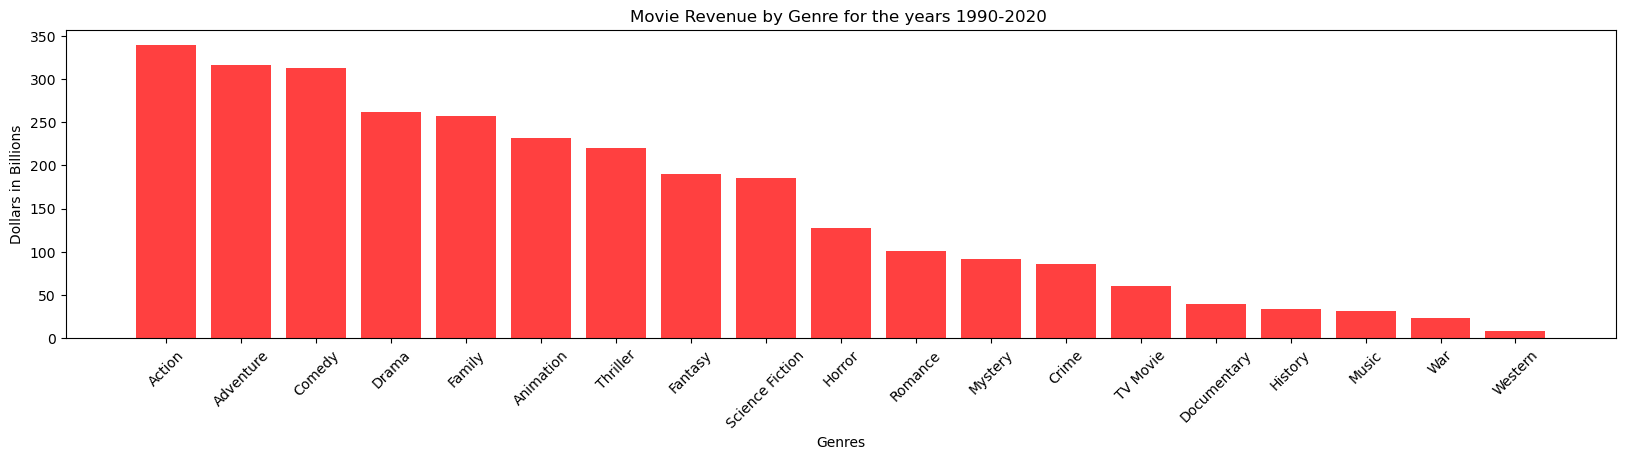

In [19]:
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,4))
plt.bar(x_axis, y_axis, color='r', alpha=0.75, align="edge")
plt.xticks(tick_locations, index_values, rotation=45)


plt.title("Movie Revenue by Genre for the years 1990-2020 ")
plt.xlabel("Genres")
plt.ylabel("Dollars in Billions")

plt.show()

In [20]:
#Create a bar chart to show profit totals for each genre
x_axis = np.arange(len(merged_RPS_df))
tick_locations = [value+0.4 for value in x_axis]
y_axis = merged_RPS_df["Profit"]/1000000000

index_values = merged_RPS_df.index

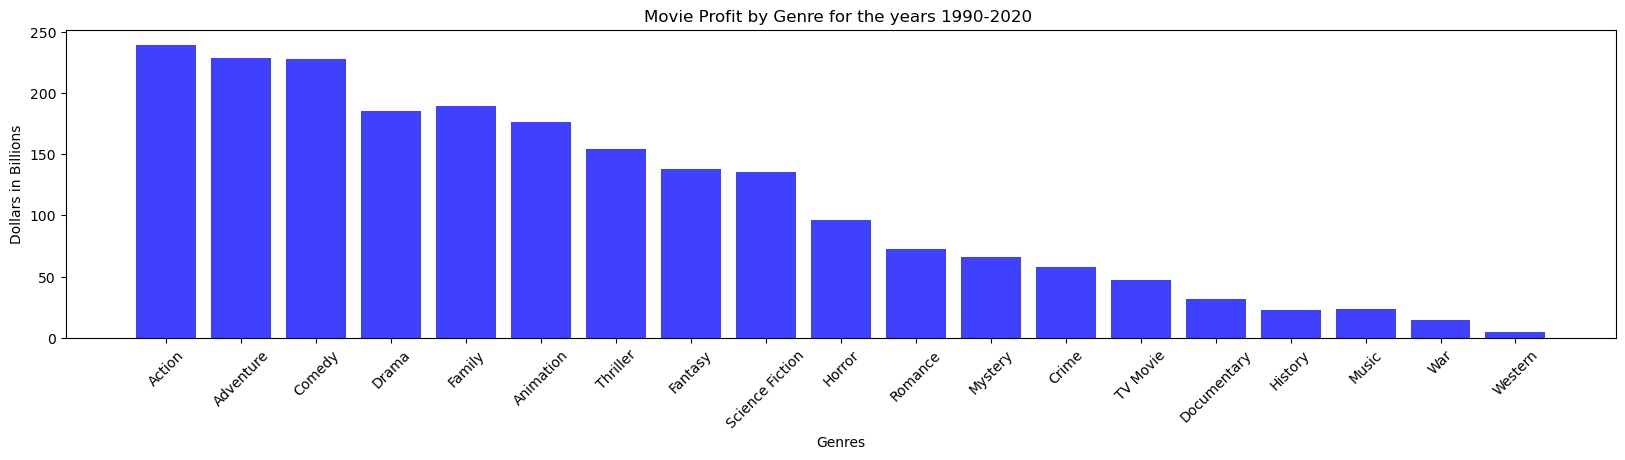

In [21]:
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,4))
plt.bar(index_values, y_axis, color='b', alpha=0.75, align="edge")
plt.xticks(tick_locations, index_values, rotation=45)


plt.title("Movie Profit by Genre for the years 1990-2020 ")
plt.xlabel("Genres")
plt.ylabel("Dollars in Billions")

plt.show()

The r-value is: 0.8606689762205489


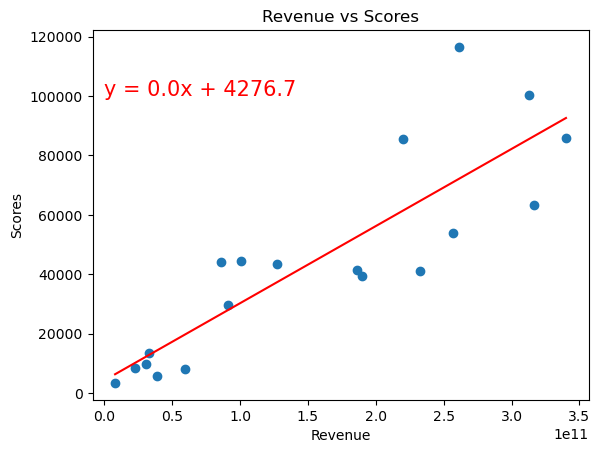

In [22]:
# Create a scatter plot which compares Revenue to Score

x_values = merged_RPS_df["Revenue"]
y_values = merged_RPS_df["Scores"]

# Establish a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color="red")
plt.annotate(line_eq, (5,100000), fontsize=15, color="red")
plt.xlabel("Revenue")
plt.ylabel("Scores")
plt.title("Revenue vs Scores")


plt.show()

The r-value is: 0.8465176874482447


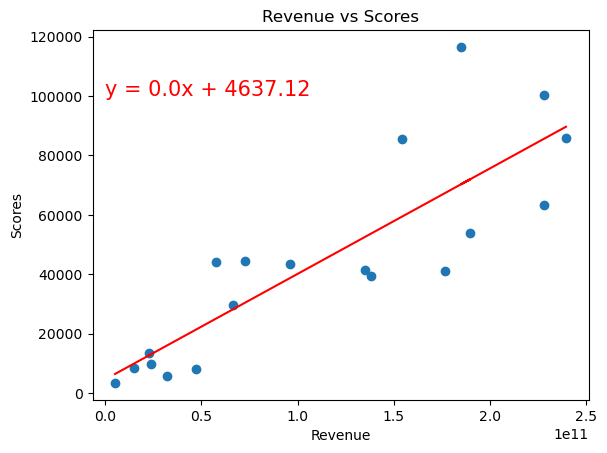

In [23]:
# Create a scatter plot which compares Revenue to Score

x_values = merged_RPS_df["Profit"]
y_values = merged_RPS_df["Scores"]

# Establish a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color="red")
plt.annotate(line_eq, (5,100000), fontsize=15, color="red")
plt.xlabel("Revenue")
plt.ylabel("Scores")
plt.title("Revenue vs Scores")


plt.show()

In [24]:
data = merged_RPS_df["Revenue"]

statistic, p_value = stats.normaltest(data)

print("Test Statistic:", statistic)
print("P-value:", p_value)

if p_value < 0.05:
    print("The data does not come from a normal distribution.")
else:
    print("The data may come from a normal distribution.")

Test Statistic: 4.8212130338960915
P-value: 0.08976083659040976
The data may come from a normal distribution.


/Users/Jake/anaconda3/envs/dev/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [25]:
data = merged_RPS_df["Profit"]

statistic, p_value = stats.normaltest(data)

print("Test Statistic:", statistic)
print("P-value:", p_value)

if p_value < 0.05:
    print("The data does not come from a normal distribution.")
else:
    print("The data may come from a normal distribution.")

Test Statistic: 5.380209543282493
P-value: 0.06787382774688892
The data may come from a normal distribution.


In [26]:
data = merged_RPS_df["Scores"]

statistic, p_value = stats.normaltest(data)

print("Test Statistic:", statistic)
print("P-value:", p_value)

if p_value < 0.05:
    print("The data does not come from a normal distribution.")
else:
    print("The data may come from a normal distribution.")

Test Statistic: 1.8267248522793609
P-value: 0.40117303896392076
The data may come from a normal distribution.
